In [18]:
import pandas as pd
import numpy as np

#Reports
from ydata_profiling import ProfileReport
from autoviz.AutoViz_Class import AutoViz_Class
import sweetviz as sv
import phik
import shap


from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

#Class
import keras
from keras import layers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import tensorflow as tf

<b>Data Frame</b>

In [19]:
df = pd.read_csv("Prepared_Zillow.csv")
df.head()



longitude  countyFIPS  monthlyHoaFee  annualHomeownersInsurance  yearBuilt  \
0 -149.90807    2020.0         0.0                 2840              1959.0     
1 -149.90822    2020.0         0.0                 2934              1961.0     
2 -149.90833    2020.0         0.0                 4187              1983.0     
3 -149.90834    2020.0         0.0                 2920              1947.0     
4 -149.90749    2020.0         0.0                 4100              2000.0     

   latitude   rentZestimate  timeOnZillow  livingArea  zipcode  \
0  61.217308     3142.0         3609.0       2668.0     99501    
1  61.217136     3113.0         4334.0       3179.0     99501    
2  61.217000     4282.0         3758.0       3059.0     99501    
3  61.216720     3458.0         3543.0       1642.0     99501    
4  61.217120     4161.0         3953.0       4483.0     99501    

   propertyTaxRate  bathrooms  bedrooms   price  homeType_CONDO  \
0       1.31           2.0        3.0    676100         0         
1       1.31           2.0        3.0    698600         0         
2       1.31           3.0        4.0    996800         0         
3       1.31           2.0        5.0    695300         0         
4       1.31           4.0        4.0    976100         1         

   homeType_SINGLE_FAMILY  cluster  cluster_average_price  
0             1               0         624584.137931      
1             1               0         624584.137931      
2             1               0         624584.137931      
3             1               0         624584.137931      
4             0               0         624584.137931

<b>Already edited</b>

<b>Y Data</b>

In [20]:
report = ProfileReport(df, title='Zillow Data')
report.to_file("ydata_Zillow.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

<b>AutoViz</b>

Shape of your Data Set loaded: (4915, 18)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  12
    Number of Integer-Categorical Columns =  4
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  2
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  0
    Number of Columns to Delete =  0
    18 Predictors classified...
        No variables removed since no ID or low-information variables found in data set
To fix these data quality issues in the dataset, import FixDQ from autoviz...
    All variab

Number of All Scatter Plots = 78


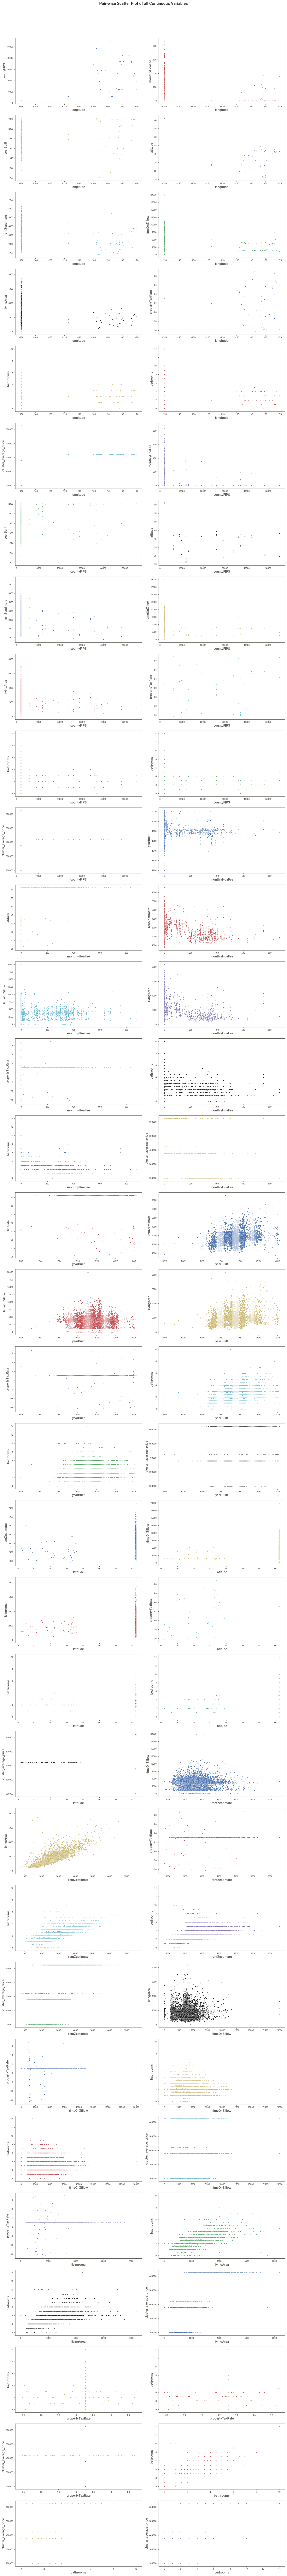

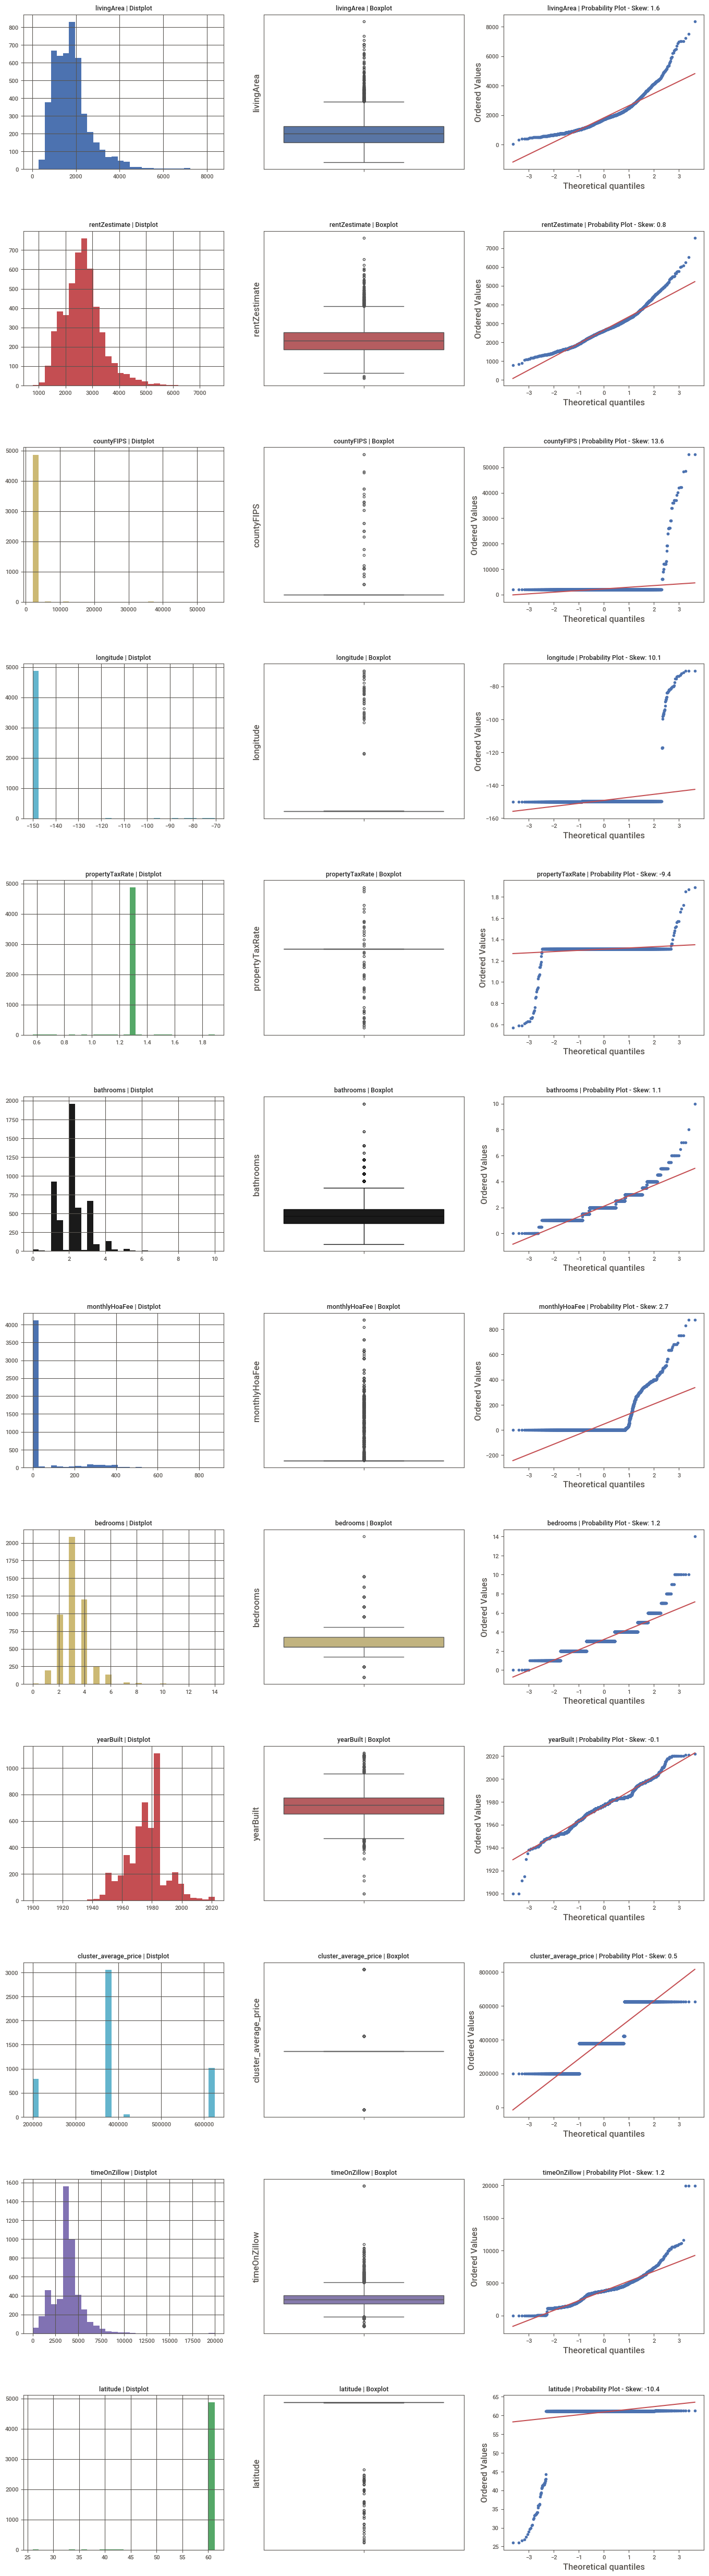

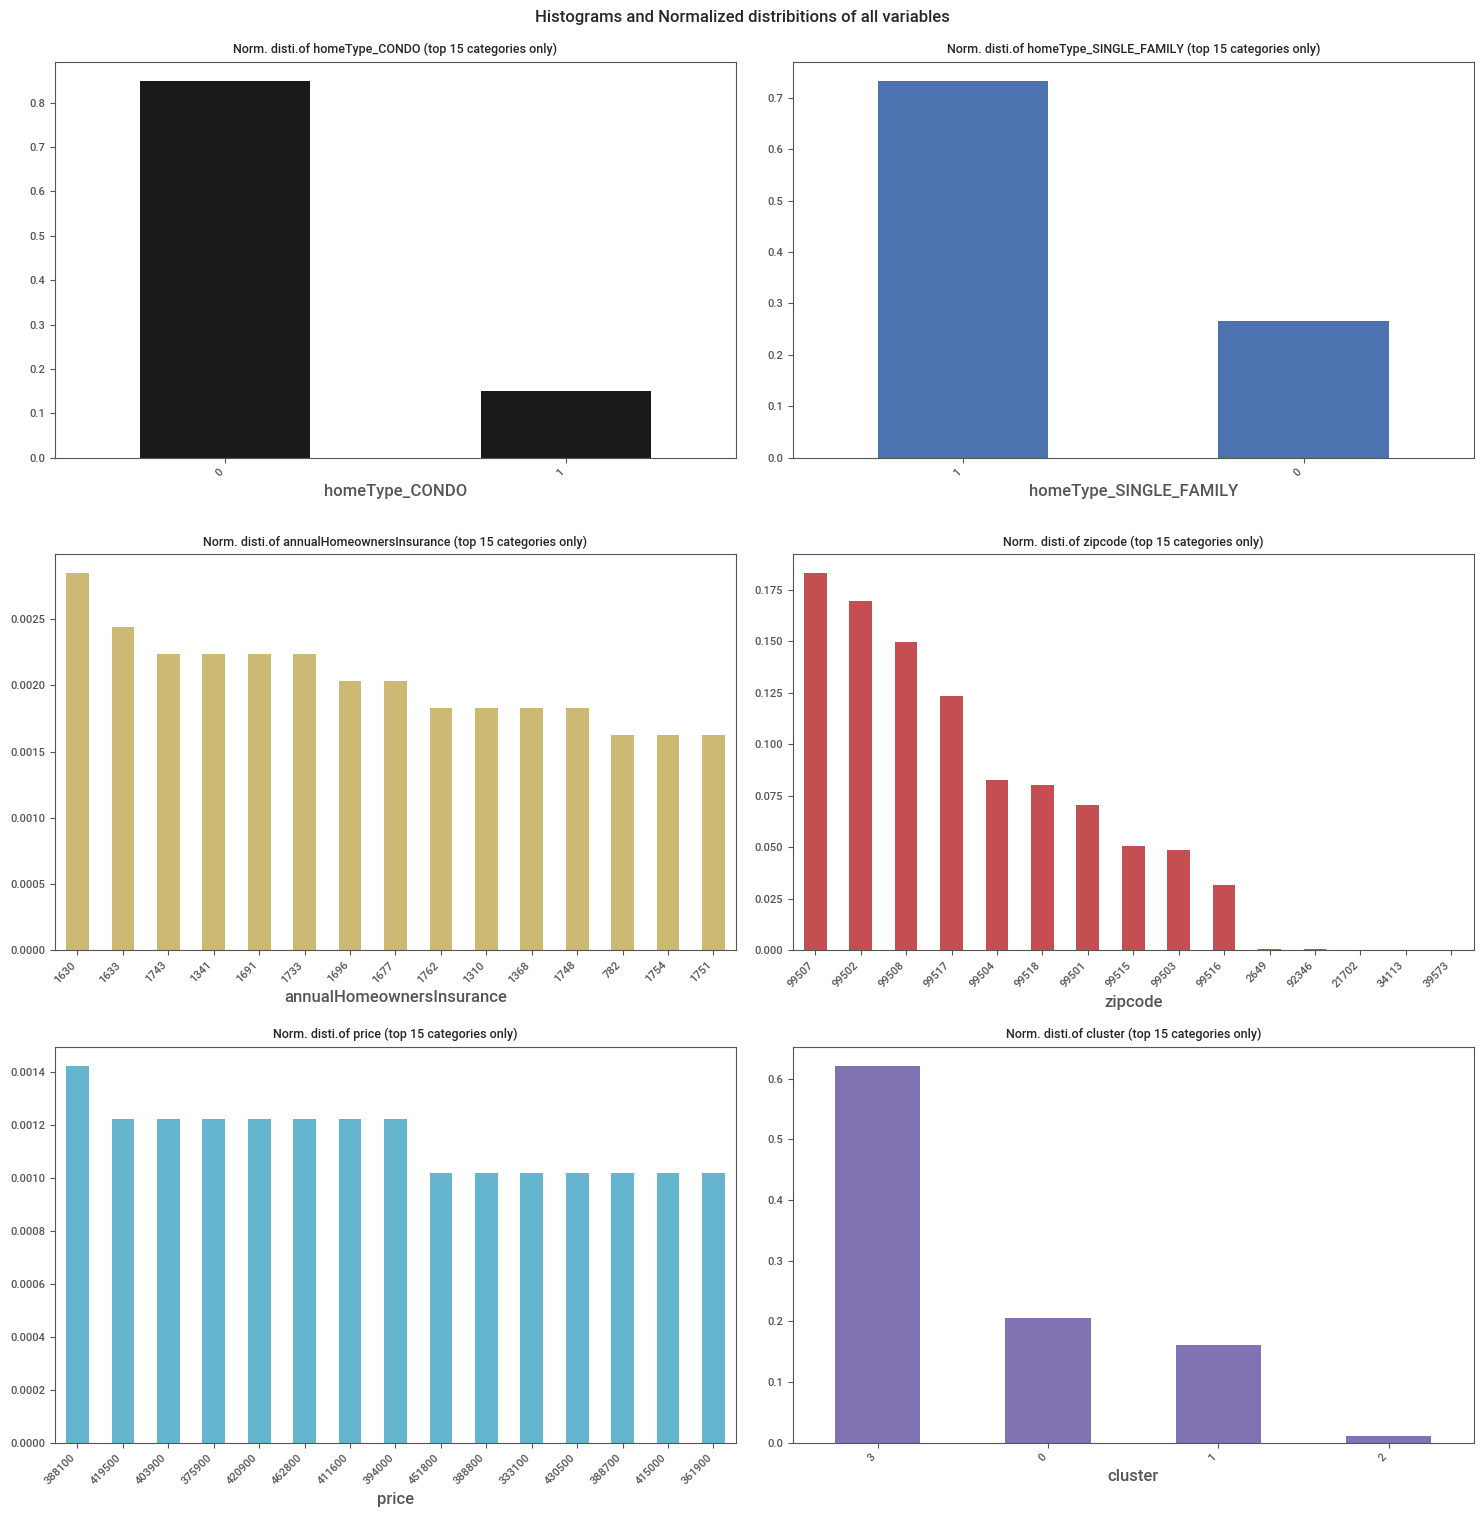

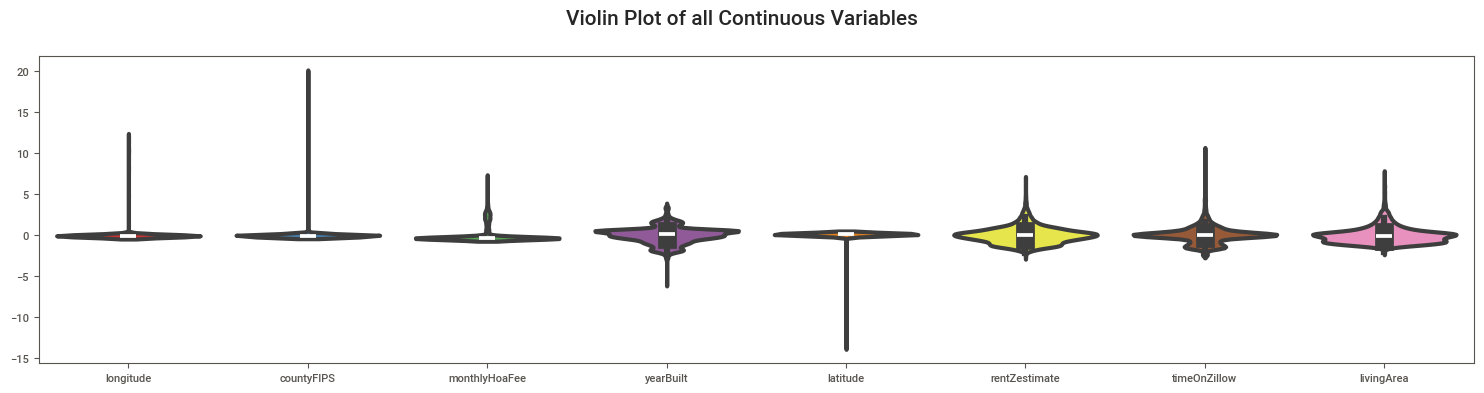

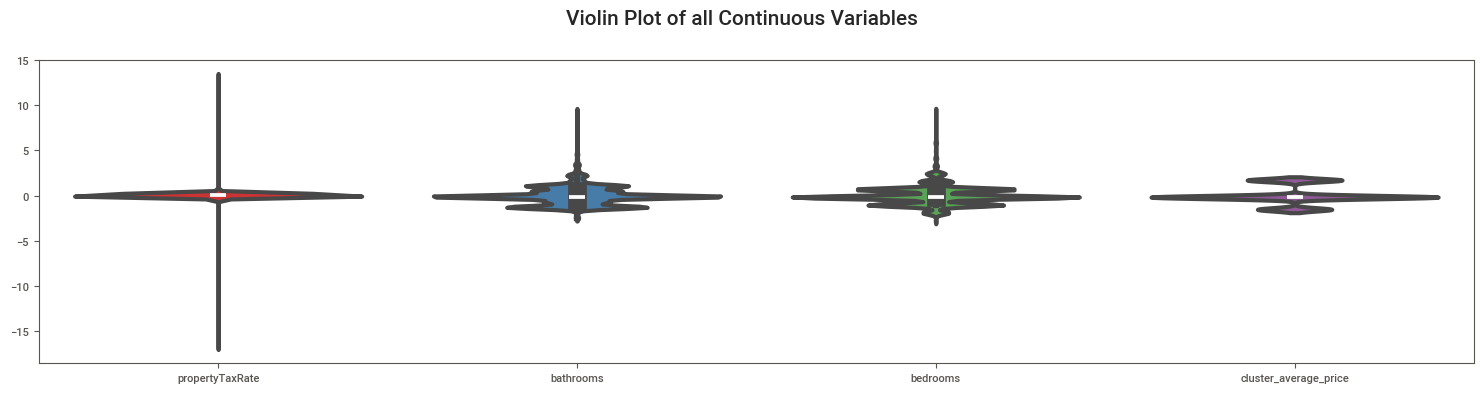

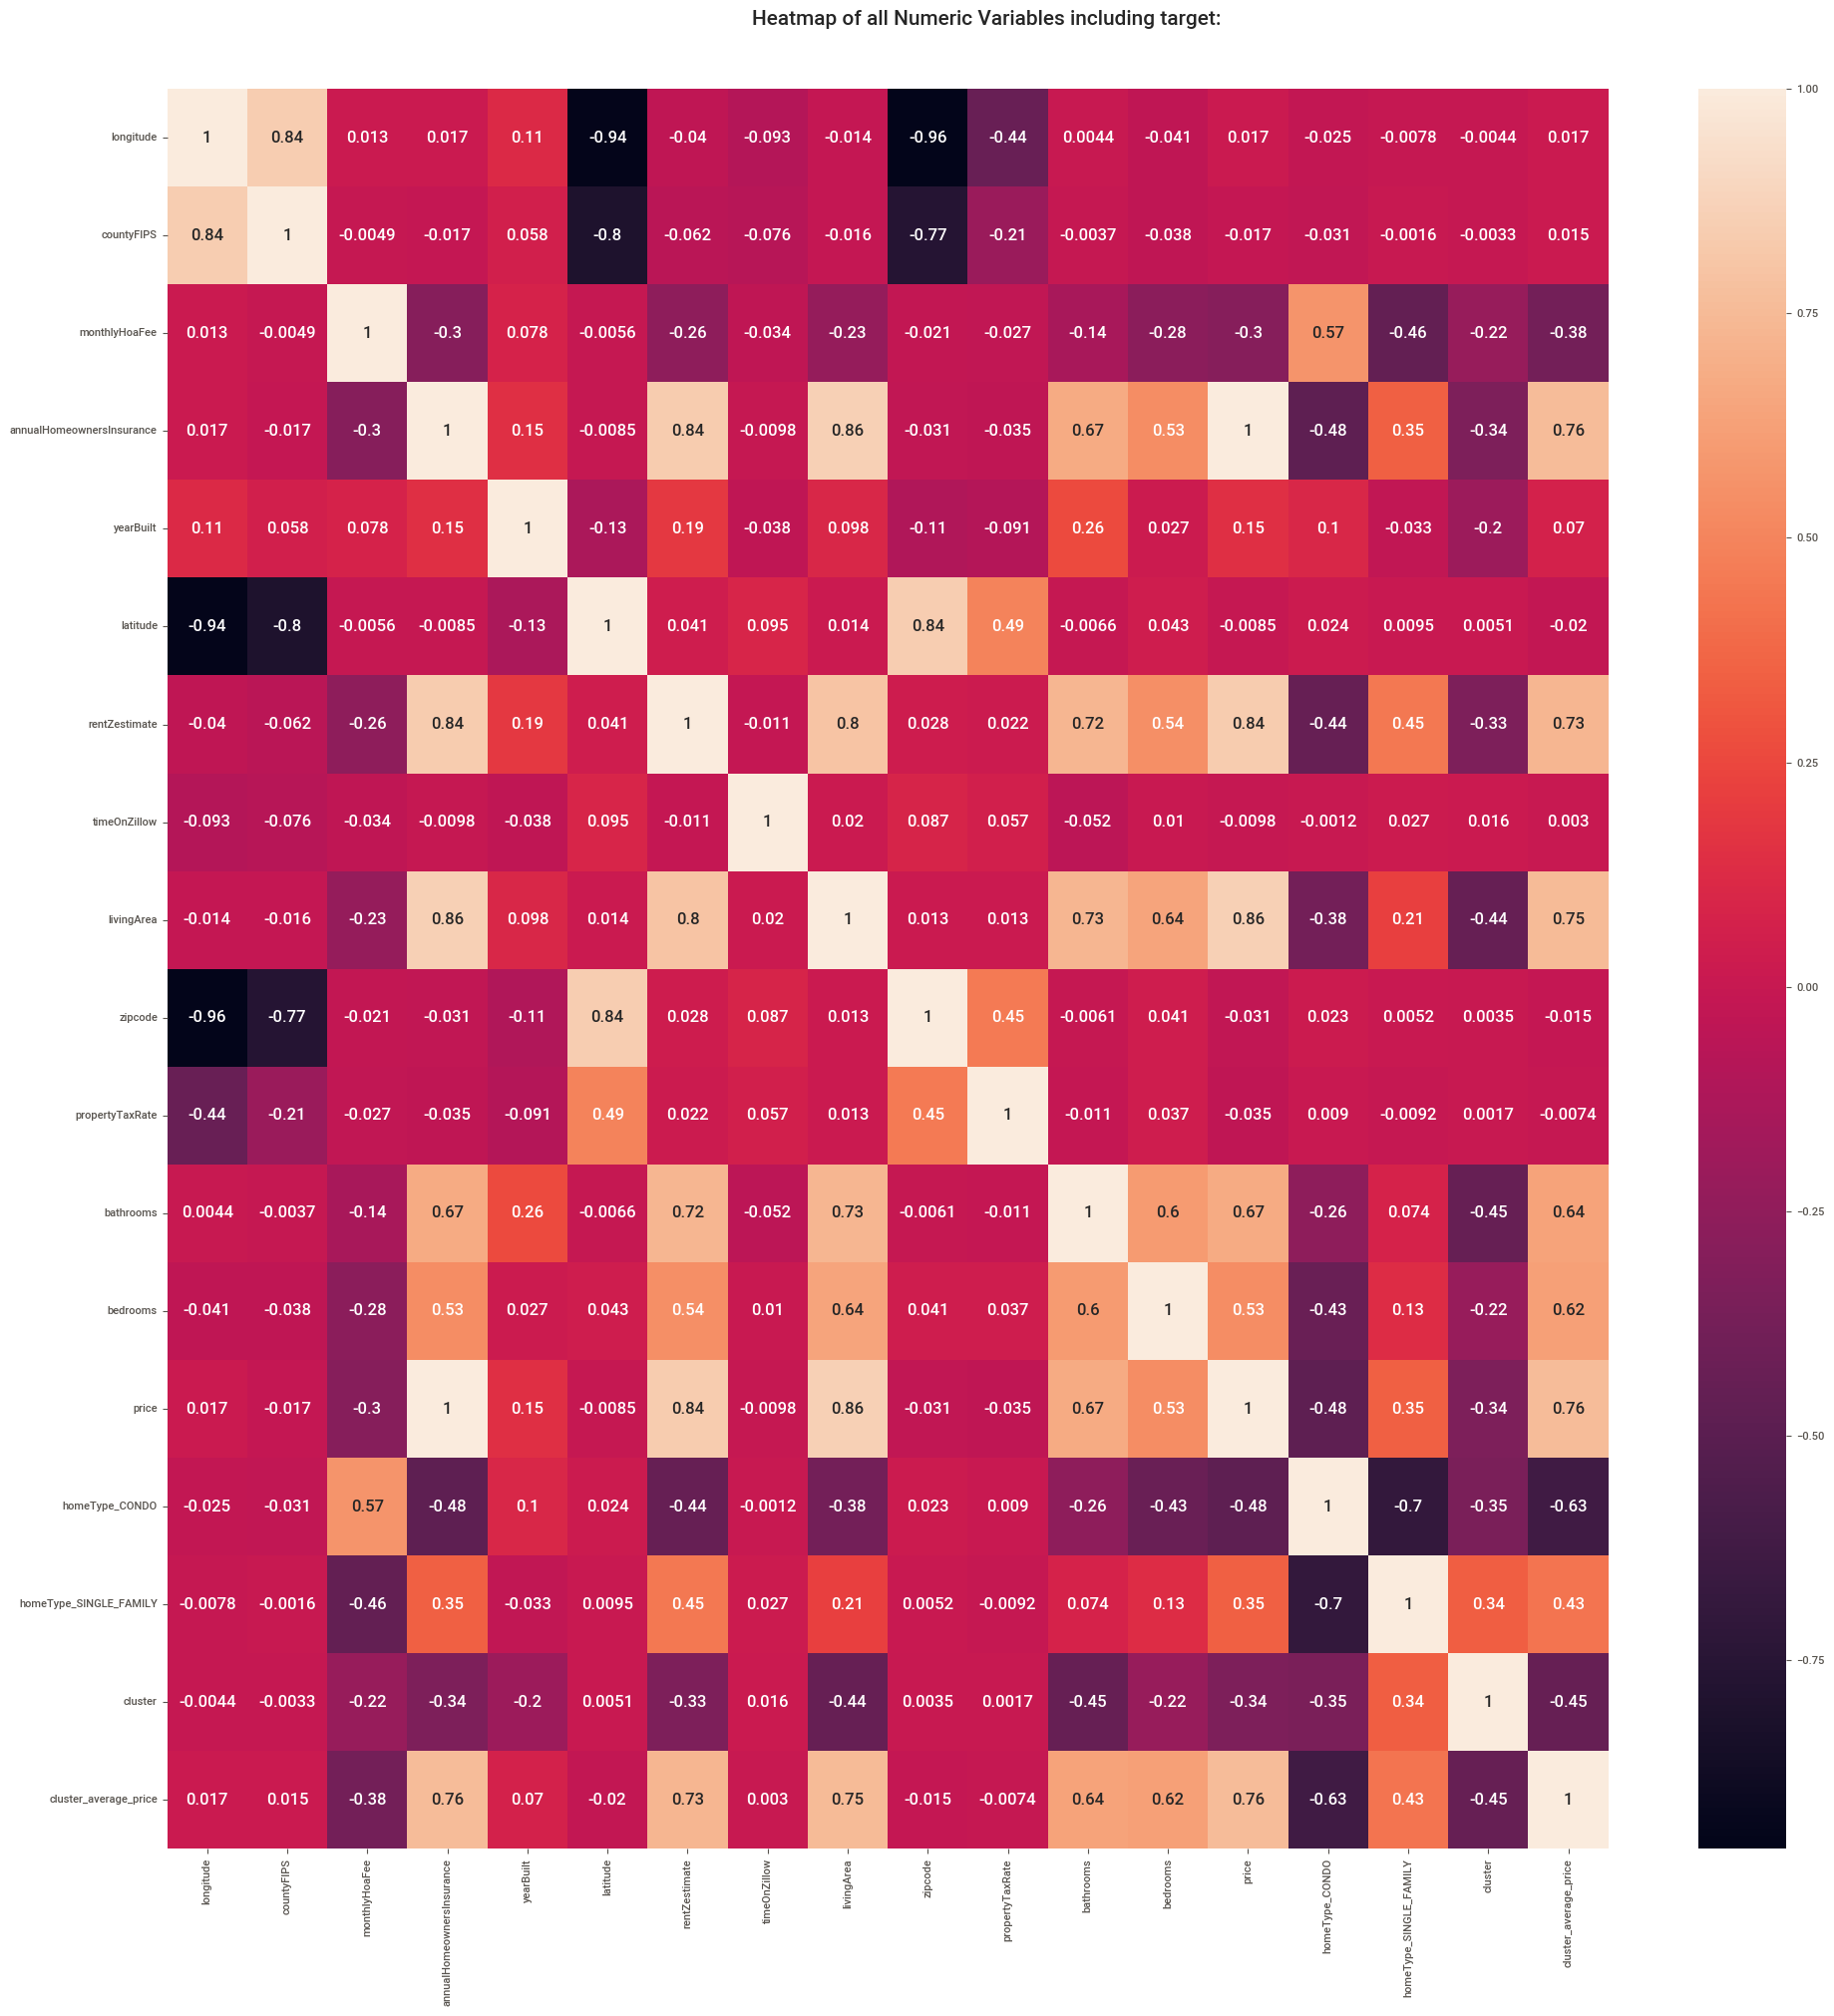

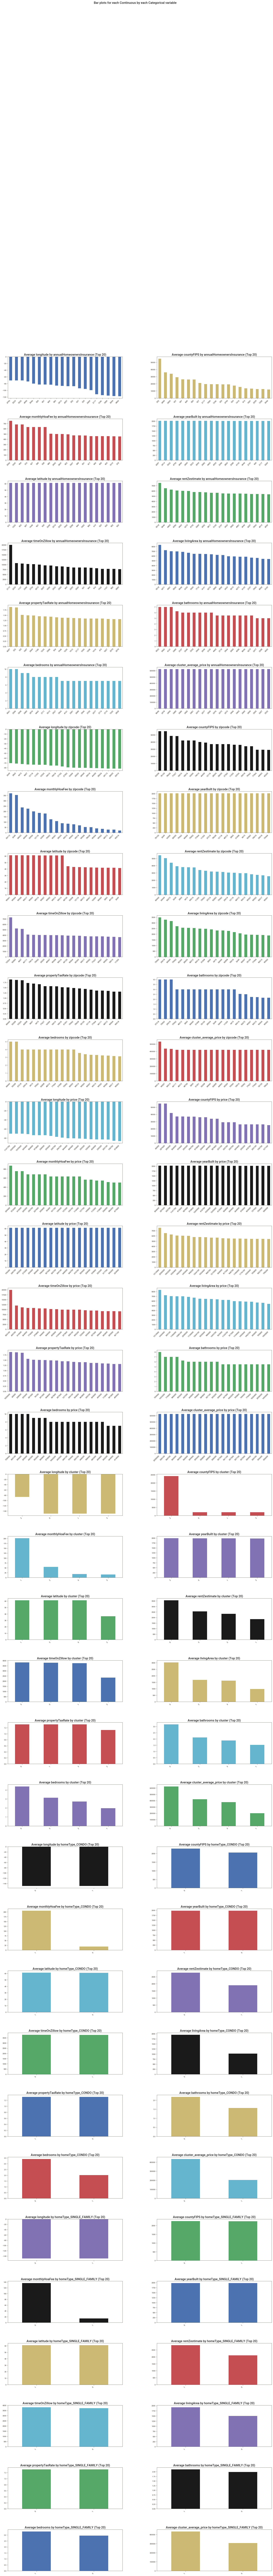

All Plots done
Time to run AutoViz = 25 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [21]:
AV = AutoViz_Class()
reg_av=report = AV.AutoViz("Prepared_Zillow.csv")

In [22]:

report = AV.AutoViz("Prepared_Zillow.csv", chart_format="bokeh", depVar="price")

Shape of your Data Set loaded: (4915, 18)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  12
    Number of Integer-Categorical Columns =  3
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  2
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  0
    Number of Columns to Delete =  0
    17 Predictors classified...
        No variables removed since no ID or low-information variables found in data set

################ Regression problem #####################


BokehModel(combine_events=True, render_bundle={'docs_json': {'6028f711-2db9-4b1f-8a94-b35d9ec8acf2': {'version…

BokehModel(combine_events=True, render_bundle={'docs_json': {'8181711e-e9ea-44e1-82ce-c09388db45bf': {'version…

BokehModel(combine_events=True, render_bundle={'docs_json': {'aac44433-3332-4a43-a687-fd199be2f05e': {'version…

BokehModel(combine_events=True, render_bundle={'docs_json': {'827847fb-6b0f-4121-8cac-dd92cde2ee98': {'version…

BokehModel(combine_events=True, render_bundle={'docs_json': {'246ba4a0-3b0b-46db-abf6-8a5084e63a33': {'version…

BokehModel(combine_events=True, render_bundle={'docs_json': {'0e0d4ce4-1792-4670-a824-fb5d1c4c27b8': {'version…

No date vars could be found in data set


BokehModel(combine_events=True, render_bundle={'docs_json': {'d2aacf90-ec5e-4e4f-a634-640894444187': {'version…

BokehModel(combine_events=True, render_bundle={'docs_json': {'f30bbffa-1454-4757-92ca-9adb3b887c9d': {'version…

Time to run AutoViz (in seconds) = 3


<b>SweetViz</b>

In [23]:
report=sv.analyze(df)
report.show_html('sv_Zillow.html')

                                             |          | [  0%]   00:00 -> (? left)

Report sv_Zillow.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


<b>Phik-Matrix</b>

In [24]:
# compute phik-matrix values
phik_matrix = df.phik_matrix()

phik_matrix

interval columns not set, guessing: ['longitude', 'countyFIPS', 'monthlyHoaFee', 'annualHomeownersInsurance', 'yearBuilt', 'latitude', 'rentZestimate', 'timeOnZillow', 'livingArea', 'zipcode', 'propertyTaxRate', 'bathrooms', 'bedrooms', 'price', 'homeType_CONDO', 'homeType_SINGLE_FAMILY', 'cluster', 'cluster_average_price']


longitude  countyFIPS  monthlyHoaFee  \
longitude                  1.000000    0.771617     0.012423      
countyFIPS                 0.771617    1.000000     0.000000      
monthlyHoaFee              0.012423    0.000000     1.000000      
annualHomeownersInsurance  0.172889    0.192597     0.468320      
yearBuilt                  0.459858    0.661984     0.282493      
latitude                   0.792400    0.819383     0.026944      
rentZestimate              0.172538    0.185248     0.385630      
timeOnZillow               0.098010    0.084922     0.039314      
livingArea                 0.000000    0.000000     0.363360      
zipcode                    0.931599    0.868375     0.035774      
propertyTaxRate            0.829196    0.915304     0.038921      
bathrooms                  0.000000    0.000000     0.171252      
bedrooms                   0.033394    0.000000     0.310816      
price                      0.172889    0.192597     0.468320      
homeType_CONDO             0.000000    0.000000     0.765379      
homeType_SINGLE_FAMILY     0.030946    0.000000     0.621343      
cluster                    0.740667    0.734476     0.542632      
cluster_average_price      0.740667    0.734476     0.542632      

                           annualHomeownersInsurance  yearBuilt  latitude  \
longitude                          0.172889           0.459858   0.792400   
countyFIPS                         0.192597           0.661984   0.819383   
monthlyHoaFee                      0.468320           0.282493   0.026944   
annualHomeownersInsurance          1.000000           0.375540   0.115886   
yearBuilt                          0.375540           1.000000   0.476537   
latitude                           0.115886           0.476537   1.000000   
rentZestimate                      0.870237           0.350319   0.152736   
timeOnZillow                       0.000000           0.059802   0.148188   
livingArea                         0.872120           0.356085   0.000000   
zipcode                            0.163999           0.592726   0.892228   
propertyTaxRate                    0.220261           0.663170   0.824414   
bathrooms                          0.572080           0.290763   0.000000   
bedrooms                           0.520480           0.282622   0.000000   
price                              1.000000           0.375540   0.115886   
homeType_CONDO                     0.873339           0.445963   0.012430   
homeType_SINGLE_FAMILY             0.704987           0.342031   0.000000   
cluster                            0.795210           0.568747   0.707906   
cluster_average_price              0.795210           0.568747   0.707906   

                           rentZestimate  timeOnZillow  livingArea   zipcode  \
longitude                    0.172538       0.098010     0.000000   0.931599   
countyFIPS                   0.185248       0.084922     0.000000   0.868375   
monthlyHoaFee                0.385630       0.039314     0.363360   0.035774   
annualHomeownersInsurance    0.870237       0.000000     0.872120   0.163999   
yearBuilt                    0.350319       0.059802     0.356085   0.592726   
latitude                     0.152736       0.148188     0.000000   0.892228   
rentZestimate                1.000000       0.000000     0.907218   0.180972   
timeOnZillow                 0.000000       1.000000     0.041502   0.097175   
livingArea                   0.907218       0.041502     1.000000   0.000000   
zipcode                      0.180972       0.097175     0.000000   1.000000   
propertyTaxRate              0.221305       0.098262     0.000000   0.843198   
bathrooms                    0.666831       0.000000     0.621317   0.000000   
bedrooms                     0.639290       0.000000     0.582120   0.000000   
price                        0.870237       0.000000     0.872120   0.163999   
homeType_CONDO               0.705325       0.026310     0.680922   0.000000   
homeType_

<b>Data Prep</b>
<p> is done in Python 3.9 you can see the report in the html folder</p>

<h3>X/Y Tets</h3>

<b>X</b>

In [25]:
# everything else except the target variable
X = df.drop(["price"], axis=1)
#this got revisited after the correlation test, removed the 1 correlations

In [26]:
X.columns

Index(['longitude', 'countyFIPS', 'monthlyHoaFee', 'annualHomeownersInsurance',
       'yearBuilt', 'latitude', 'rentZestimate', 'timeOnZillow', 'livingArea',
       'zipcode', 'propertyTaxRate', 'bathrooms', 'bedrooms', 'homeType_CONDO',
       'homeType_SINGLE_FAMILY', 'cluster', 'cluster_average_price'],
      dtype='object')

<b>Y Regression</b>

In [27]:
# have only the target variable here (dependent variable)
y = df['price']

In [28]:
# have only the target variable here (dependent variable)
# y_temp = df['price_range']

# since we are doing classification, we have to process our target values with an encoder
# and convert them into a categorical TensorFlow/Keras -format 
# le = LabelEncoder()
# y_enc = le.fit_transform(y_temp)

# Converting the label into a matrix form
# y = tf.keras.utils.to_categorical(y_enc)

<b>Shap</b>

In [29]:
%matplotlib inline

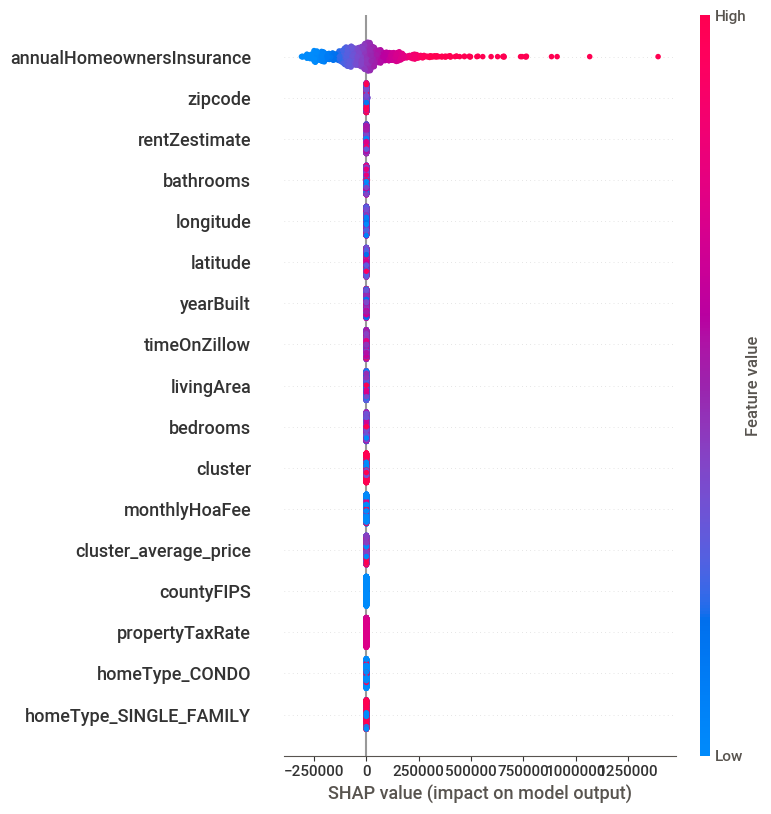

Feature Importances using SHAP:
            Feature             Importance  
0                   longitude      20.040934
1                  countyFIPS       3.591527
2               monthlyHoaFee       7.672174
3   annualHomeownersInsurance  121847.322678
4                   yearBuilt      17.165728
5                    latitude      19.421393
6               rentZestimate      23.126182
7                timeOnZillow      16.524504
8                  livingArea      15.972022
9                     zipcode      36.879688
10            propertyTaxRate       2.286697
11                  bathrooms      21.115165
12                   bedrooms      10.338920
13             homeType_CONDO       2.168719
14     homeType_SINGLE_FAMILY       1.703590
15                    cluster       8.173889
16      cluster_average_price       4.395764


In [30]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Initialize SHAP explainer
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# Plot SHAP summary
shap.summary_plot(shap_values, X_test, show=True)

# Feature importance
importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': np.mean(np.abs(shap_values), axis=0)
})
print("Feature Importances using SHAP:")
print(importance)

In [31]:
# pip install skfeature-chappers
from skfeature.function.similarity_based import fisher_score

# get the fisher's score rankings 
ranks = fisher_score.fisher_score(X.values, y.values)

# create a pandas DataFrame for easier interpretation
feat_importances = pd.Series(ranks, X.columns)
feat_importances.plot(kind='barh')

FloatingPointError: divide by zero encountered in divide

<b>lime</b>